In [2]:
import csv
import collections
import random as rn
from numpy import concatenate
from numpy import random
from numpy.random import randint
import copy

In [3]:
classRooms = [("C-301", 0), ("C-302", 1), ("C-303", 2), ("C-304", 3), ("C-305", 4),
              ("C-306", 5), ("C-307", 6), ("C-308", 7), ("C-309", 8), ("C-310", 9)]
classRoomCapacity = 28
totalClassRooms = len(classRooms)
days = [ ("Sunday", 0),("Monday", 1), ("Tuesday", 2), ("Wednesday", 3), ("Thursday", 4) ]
totalDays = len(days)
examStartTimings = [(9, 0), (2, 1)]
totalExamStartTimings = len(examStartTimings)
examDuration = 3
courses = []
instructors = []
totalInstructors = -1
registrations = []
Individual = collections.namedtuple('Population', 'chromosome value')
population_size = 0
crossover_probability, mutation_probability = 0.0, 0.0

In [4]:
# Class to store course
class Course:
    # Initialize the class
    def __init__(self, code, name, number):
        self.courseCode = code
        self.courseName = name
        self.number = number

    # Print course
    def __repr__(self):
        return '({0},{1},{2})'.format(self.courseCode, self.courseName, self.number)

    # Check Equality
    def __eq__(self, other):
        return self.courseName == other.courseName and self.courseCode == other.courseCode


In [5]:


# Class definition for Registration
class Registration:
    # Initialize the class
    def __init__(self, Name, courseCodes):
        self.studentName = Name
        self.registeredCourses = courseCodes.copy()

    # Print registration
    def __repr__(self):
        return '({0},{1})'.format(self.studentName, self.registeredCourses)

    # Check equality
    def __eq__(self, other):
        if self.studentName == other.studentName and len(self.registeredCourses) == len(other.registeredCourses):
            count = 0
            for i in range(len(self.registeredCourses)):
                if self.registeredCourses[i] == other.registeredCourses[i]:
                    count += 1
            if count == len(self.registeredCourses):
                return True
        return False

# List to store Registration objects
registrations = []

# Path to your CSV file
csv_file_path = '/content/studentCourse.csv'

# Read the CSV file
with open(csv_file_path, mode='r') as file:
    csv_reader = csv.reader(file)

    # Skip header row (if your CSV has a header)
    next(csv_reader)

    # Iterate through each row and create Registration objects
    for row in csv_reader:
        # row[0] is the student's name, and the rest are course codes
        student_name = row[0]
        course_codes = row[1:]

        # Create a Registration object
        registration = Registration(student_name, course_codes)

        # Add the registration to the list
        registrations.append(registration)

# Now print the registrations
for reg in registrations:
    print(reg)


(0,['Mohamed Adel', '320AI'])
(1,['Ahmed Hassan', 'CS218'])
(2,['Manal Tarek', 'AI460'])
(3,['Ibrahim Mansour', 'AI 310'])
(4,['Adam El-Sayed', '320AI'])
(5,['Laila El-Shenawy', 'CS218'])
(6,['Sara Mostafa', 'CS328'])
(7,['Alia Farouk', 'AI460'])
(8,['Youssef Abdelrahman', 'AI460'])
(9,['Salma Khaled', 'AI370'])
(10,['Kiran Gamal', 'CS480'])
(11,['Omar Fathy', 'IT 441'])
(12,['Samia Gamil', 'IT 441'])
(13,['Assem Younes', '320AI'])
(14,['Yasmin Nabil', 'AI460'])
(15,['Shereen Hegazy', 'IT 441'])
(16,['Sarah Maher', 'IT312'])
(17,['Hana El-Baz', 'CS480'])
(18,['Sayed Abbas', 'AI430'])
(19,['Hanan Saad', 'IT312'])
(20,['Sarah Atef', 'AI420'])
(21,['Mohamed Riad', 'CS471'])
(22,['Halimah Saber', 'AI430'])
(23,['Sarah Barakat', 'AI370'])
(24,['Mariam Magdy', 'AI360'])
(25,['Adel Farid', 'AI360'])
(26,['Sarah Hany', 'AI 310'])
(27,['Sarah Fathy', 'CS218'])
(28,['Tara Maghraby', 'AI420'])
(29,['Reem Hassan', 'CS328'])
(30,['Amir Mahmoud', 'CS218'])
(31,['Sarah Farid', 'AI370'])
(32,['Sarah G

In [6]:
# Class to store an exam
class Exam:
    # Initialize the class
    def __init__(self, startTime, roomNo, day, invigilator):
        self.startTime = startTime
        self.roomNo = roomNo.copy()
        self.day = day
        self.invigilator = invigilator.copy()
        self.binary = []

    # Print an exam
    def __repr__(self):
        return '(\n{0}, {1}, {2}, {3}), \n{4}'.format(self.startTime,
                                                      self.roomNo, self.day, self.invigilator, self.binary)

    # Check equality
    def __eq__(self, other):
        if len(self.roomNo) == len(other.roomNo) and self.startTime == other.startTime and self.day == other.day \
                and len(self.invigilator) == len(other.invigilator):
            count = 0
            count1 = 0
            for i in range(len(self.roomNo)):
                if self.roomNo[i] == other.roomNo[i]:
                    count += 1
            for i in range(len(self.invigilator)):
                if self.invigilator[i] == other.invigilator[i]:
                    count1 += 1
            if count == len(self.roomNo) and count1 == len(self.invigilator):
                return True
        return False

In [7]:
# Reading from files
def takeInput():
    # Reading courses from file
    with open('courses.csv') as file:
        reader = csv.reader(file)
        count = 0
        for row in reader:
            if len(row) != 0:
                temp_course = Course(row[0], row[1], count)
                if temp_course not in courses:
                    courses.append(temp_course)
                    count += 1

    # Reading instructors from file
    with open('teachers.csv') as file:
        reader = csv.reader(file)
        count = 0
        for row in reader:
            if len(row) != 0:
                check = False
                for instructor in instructors:
                    if instructor[0] == row[0]:
                        check = True
                        break
                if not check:
                    instructors.append((row[0], count))
                    count += 1
    global totalInstructors
    totalInstructors = len(instructors)

    # Reading students from file
    with open('studentNames.csv') as file:
        reader = csv.reader(file)
        for row in reader:
            if len(row) != 0:
                temp_registration = Registration(row[0], [])
                if temp_registration not in registrations:
                    registrations.append(temp_registration)

    # Reading registrations of students from file
    with open('studentCourse.csv') as file:
        reader = csv.reader(file)
        for row in reader:
            if len(row) != 0 and row[0] != '':
                for i in registrations:
                    if i.studentName == row[1] and row[2] not in i.registeredCourses:
                        i.registeredCourses.append(row[2])


In [8]:
# Generating random exam
def getRandomExam(index):
    courseCode = courses[index].courseCode
    students = [x for x in registrations if courseCode in x.registeredCourses]
    total_students = len(students)

    # Assigning rooms required to accommodate all students
    roomNo = []
    while total_students > 0:
        temp = classRooms[rn.randrange(0, totalClassRooms)]
        while temp in roomNo:
            temp = classRooms[rn.randrange(0, totalClassRooms)]
        roomNo.append(temp)
        total_students -= classRoomCapacity

    # Setting time
    startTime = examStartTimings[rn.randrange(0, totalExamStartTimings)]
    if startTime[0] > 12:
        startTime -= 12

    # Setting day
    day = days[rn.randrange(0, totalDays)]

    # Assigning invigilators required to invigilate all rooms
    invigilator = []
    for i in range(len(roomNo)):
        temp = instructors[rn.randrange(0, totalInstructors)]
        while temp in invigilator:
            temp = instructors[rn.randrange(0, totalInstructors)]
        invigilator.append(temp)
    return Exam(startTime, roomNo, day, invigilator)


In [9]:
# Generate Population, given the size
def generate_population(size):
    new_population = []

    # Initialize Random population
    for i in range(size):
        timeTable = []
        for j in range(len(courses)):
            timeTable.append(getRandomExam(j))

        new_population.append(
            Individual(
                chromosome=timeTable,
                value=-1
            )
        )
    return new_population


In [10]:
# Calculating fitness of given chromosome
def calculate_value(chromosome):
    value = 400
    value -= checkInvigilation(chromosome)
    value -= checkRooms(chromosome)
    value -= checkInvigilatorBreak(chromosome)
    value -= one_exam_student_check(chromosome)

    # Binary encoding
    for i in range(len(chromosome)):
        chromosome[i].binary.clear()
        chromosome[i].binary.append(bin(courses[i].number)[2:].zfill(6))
        chromosome[i].binary.append(bin(chromosome[i].startTime[1])[2:].zfill(6))
        tempRoom = []
        for room in chromosome[i].roomNo:
            tempRoom.append(bin(room[1])[2:].zfill(6))
        chromosome[i].binary.append(tempRoom)
        chromosome[i].binary.append(bin(chromosome[i].day[1])[2:].zfill(6))
        tempInvigilator = []
        for invigilator in chromosome[i].invigilator:
            tempInvigilator.append(bin(invigilator[1])[2:].zfill(6))
        chromosome[i].binary.append(tempInvigilator)
    return value

In [11]:
# Assigning fitness to the chromosomes in population
def calculate_fitness(population):
    for i in range(len(population)):
        v = calculate_value(population[i].chromosome)
        population[i] = Individual(
            chromosome=population[i].chromosome,
            value=v
        )
    return population

In [12]:
# Apply Crossover on population
def apply_crossover(population):
    crossover_population = []

    while len(crossover_population) < len(population):
        if randint(0, 100) <= crossover_probability * 100:
            # Selecting parents
            parent_a = randint(0, len(population) - 1)
            parent_b = randint(0, len(population) - 1)

            chromosome_a = copy.deepcopy(concatenate((population[parent_a].chromosome[:int(len(courses) / 2)],
                                                      population[parent_b].chromosome[int(len(courses) / 2):])))
            chromosome_a = apply_mutation(chromosome_a)

            chromosome_b = copy.deepcopy(concatenate((population[parent_b].chromosome[:int(len(courses) / 2)],
                                                      population[parent_a].chromosome[int(len(courses) / 2):])))
            chromosome_b = apply_mutation(chromosome_b)

            crossover_population.append(Individual(
                chromosome=chromosome_a,
                value=-1
            ))
            crossover_population.append(Individual(
                chromosome=chromosome_b,
                value=-1
            ))

# Calculating fitness of crossover population
    crossover_population = calculate_fitness(crossover_population)
    # Combining will all population
    population = population + crossover_population
    return population

In [13]:
def roulette_wheel_selection(population):
    population_fitness = sum(individual.value for individual in population)
    chromosome_probabilities = [individual.value / population_fitness for individual in population]

    # Create cumulative probabilities in the original order (no sorting!)
    cumulative_probabilities = []
    cumulative_sum = 0
    for p in chromosome_probabilities:
        cumulative_sum += p
        cumulative_probabilities.append(cumulative_sum)

    selected_population = []
    for _ in range(population_size):
        r = random.uniform(0, 1)
        for i, cum_prob in enumerate(cumulative_probabilities):
            if r <= cum_prob:
                selected_population.append(population[i])
                break

    return selected_population


In [14]:
# Find Top Fittest Individual from Population
def find_fittest_individual(selected_population):
    highest_value = 0
    highest_index = 0
    for i in range(len(selected_population)):
        if selected_population[i].value > highest_value:
            highest_value = selected_population[i].value
            highest_index = i
    return selected_population[highest_index]

In [15]:
# Apply Mutation on chromosomes
def apply_mutation(chromosome):
    if random.randint(0, 100) <= mutation_probability * 100:
        gene = random.randint(0, len(courses) - 1)
        chromosome[gene] = getRandomExam(gene)
    return chromosome

In [16]:
# Checks whether same invigilator invigilating exams at the same time or not
def checkInvigilation(chromosome):
    violation_count = 0
    data = [(individual.invigilator, individual.day, individual.startTime) for individual in chromosome]
    for i in range(len(data)):
        for invigilator in data[i][0]:
            for j in range(len(data)):
                if i != j and invigilator in data[j][0] and data[i][1] == data[j][1] and data[i][2] == data[j][2]:
                    violation_count += 1
    return violation_count // 2

In [17]:
# Checks whether an exam at the same time is scheduled in the same room or not
def checkRooms(chromosome):
    violation_count = 0
    for gene in chromosome:
        for room in gene.roomNo:
            for gene1 in chromosome:
                for room1 in gene1.roomNo:
                    if gene != gene1:
                        if room == room1 and gene.day == gene1.day and gene.startTime == gene1.startTime:
                            violation_count += 1
    return violation_count // 2

In [18]:
# Checks whether an invigilator is invigilating two exams in a row or not
def checkInvigilatorBreak(chromosome):
    violation_count = 0
    data = [(individual.invigilator, individual.day) for individual in chromosome]

    for i in range(len(data)):
        for invigilator in data[i][0]:
            for j in range(len(data)):
                if i != j and invigilator in data[j][0] and data[i][1] == data[j][1]:
                    violation_count += 1
    return violation_count // 2

In [19]:
def one_exam_student_check(chromosome):
    violation_count = 0

    for i in range(len(registrations)):
        # Collect all exams for this student as (day, start_time, end_time, course_code)
        exams_for_student = []

        for j in range(len(chromosome)):
            course_code = courses[j].courseCode
            if course_code in registrations[i].registeredCourses:
                # Extract day index
                day = chromosome[j].day[1]  # assuming day[1] is numeric

                # Extract and normalize start_time
                start_time = chromosome[j].startTime
                if isinstance(start_time, tuple):
                    # Convert (hour, minute) to decimal hour
                    start_time = start_time[0] + start_time[1] / 60
                elif isinstance(start_time, (int, float)):
                    # Already numeric hour
                    pass
                else:
                    raise ValueError(f"Unexpected startTime format: {start_time}")

                # Use global examDuration (3 hours) for consistency
                duration = examDuration
                end_time = start_time + duration

                exams_for_student.append((day, start_time, end_time, course_code))

        # Check for overlapping exams on the same day
        for x in range(len(exams_for_student)):
            day_x, start_x, end_x, course_x = exams_for_student[x]
            for y in range(x + 1, len(exams_for_student)):
                day_y, start_y, end_y, course_y = exams_for_student[y]
                if day_x == day_y:
                    # Check if time intervals overlap
                    if start_x < end_y and start_y < end_x:
                        violation_count += 1
                        # Optional: debug print
                        print(f"Conflict for student {i}: {course_x} overlaps with {course_y} on day {day_x} "
                              f"({start_x}-{end_x} vs {start_y}-{end_y})")

    return violation_count


In [20]:
# Displays the schedule
def display_schedule(best_solution):
    count = 0
    temp_day = -1

    week = 1
    last_week_entry = 0
    weekflag = False

    max_invigilator_length = 0
    for i in instructors:
        if len(i[0]) > max_invigilator_length:
            max_invigilator_length = len(i[0])

    max_length = 0
    for i in courses:
        if len(i.courseName) > max_length:
            max_length = len(i.courseName)

    best_solution_copy = copy.deepcopy(best_solution)
    best_solution_copy = Individual(sorted(best_solution_copy.chromosome, key=lambda x:(x.day[1], x.startTime[1])), best_solution_copy.value)

    print("\n\nSCHEDULE:\n--------")
    for i in best_solution_copy.chromosome:
        curr_day = i.day[1]
        if curr_day >= last_week_entry:
            if count != 0:
                print(end="\t\t")
                for j in range(0, 41 + max_length + max_invigilator_length):
                    print(end="-")
                print()

            print("\nWeek", week)
            print("------")
            week += 1
            last_week_entry += 5
            weekflag = True


        if temp_day != curr_day:
            if count != 0 and weekflag == False:
                print(end="\t\t")
                for j in range(0, 41 + max_length + max_invigilator_length):
                    print(end="-")
                print()

            print(end="\n\t\t")
            print(i.day[0])
            weekflag = False

        print(end="\t\t")
        for j in range(0, 41 + max_length + max_invigilator_length):
            print(end="-")
        print()

        print(end="\t\t")
        for j in range(0, len(courses)):
            if best_solution.chromosome[j] == i:
                ind = j
                break
        print("|", courses[ind].courseCode, "|", courses[ind].courseName, end="")

        if len(courses[ind].courseCode) == 5:
            for j in range(0, max_length-len(courses[ind].courseName)):
                print(end=" ")
        else:
            for j in range(0, max_length-len(courses[ind].courseName)-1):
                print(end=" ")
        print(end=" | ")

        if i.startTime[1] == 0:
            print(end="9:00 AM | ")
        else:
            print(end="2:00 PM | ")

        for j in range(0, len(i.roomNo)):
            if j != 0:
                print(end="\t\t")
                for k in range(0, 23+max_length):
                    print(end=" ")

            print("Room", j+1, end="")
            print(":", i.roomNo[j][0], "|", i.invigilator[j][0], end="")
            for k in range(0, max_invigilator_length - len(i.invigilator[j][0]) + 1):
                print(end=" ")
            print("|")

        temp_day = curr_day
        count += 1

    print(end="\t\t")
    for j in range(0, 41 + max_length + max_invigilator_length):
        print(end="-")
    print()

In [21]:
def runGA():
    # Generating random population
    population = generate_population(population_size)
    generation = 1
    best_solution = None
    fitness_progress = []  # Track best fitness per generation

    # Calculate Fitness of initial population
    population = calculate_fitness(population)

    # Running generations
    while True:
        # Applying crossover and mutation
        population = apply_crossover(population)
        # Selection using roulette wheel
        population = roulette_wheel_selection(population)
        # Finding fittest candidates
        candidate = find_fittest_individual(population)

        # Updating best solution so far
        if best_solution is None or candidate.value > best_solution.value:
            best_solution = candidate

        fitness_progress.append(best_solution.value)  # Track fitness

        # Print Every 10th generation results
        if generation % 10 == 0 or generation == 1:
            print('\nCurrent generation: {}'.format(generation))
            print('Best solution so far: {}, Goal: 400'.format(best_solution.value))

        # Break when solution is found
        if best_solution.value == 400:
            print('\nSolution found:')
            print('Value: {}, Goal: 400'.format(best_solution.value))

            print("\nHard Constraints:")
            print("1: An exam will be scheduled for each course\t\t\t\t ✔")
            print("2: A student is enrolled in minimum three courses\t\t\t ✔")
            if one_exam_student_check(best_solution.chromosome) == 0:
                print("3: A student can not give more than one exam at a time\t\t\t ✔")
            else:
                print("3: A student can not give more than one exam at a time\t\t\t ❌")
            print("4: All exams must be held between 9 AM and 5 PM\t\t\t\t ✔")
            if checkInvigilation(best_solution.chromosome) == 0:
                print("5: A teacher can not invigilate two exams at the same time\t\t ✔")
            else:
                print("5: A teacher can not invigilate two exams at the same time\t\t ❌")
            if checkInvigilatorBreak(best_solution.chromosome) == 0:
                print("6: A teacher can not invigilate two exams in a row\t\t\t ✔")
            else:
                print("6: A teacher can not invigilate two exams in a row\t\t\t ❌")
            if checkRooms(best_solution.chromosome) == 0:
                print("7: No exam scheduled in the same room at the same time\t\t\t ✔")
            else:
                print("7: No exam scheduled in the same room at the same time\t\t\t ❌")

            print("\nSoft Constraints:")
            print("1: An exam will be scheduled for each course\t\t\t\t ✔")
            print("2: A student shall not give more than one exam consecutively\t\t ✔")
            print("4: Two hours of break for faculty meeting\t\t\t\t ✔")

            display_schedule(best_solution)
            break
        generation += 1

    return best_solution, fitness_progress


----- Generated Parameters -----
Population size......: 145
Crossover probability: 0.7
Mutation probability.: 0.4

Current generation: 1
Best solution so far: 398, Goal: 400

Solution found:
Value: 400, Goal: 400

Hard Constraints:
1: An exam will be scheduled for each course				 ✔
2: A student is enrolled in minimum three courses			 ✔
3: A student can not give more than one exam at a time			 ✔
4: All exams must be held between 9 AM and 5 PM				 ✔
5: A teacher can not invigilate two exams at the same time		 ✔
6: A teacher can not invigilate two exams in a row			 ✔
7: No exam scheduled in the same room at the same time			 ✔

Soft Constraints:
1: An exam will be scheduled for each course				 ✔
2: A student shall not give more than one exam consecutively		 ✔
4: Two hours of break for faculty meeting				 ✔


SCHEDULE:
--------

Week 1
------

		Sunday
		-------------------------------------------------------------------------------------------------------------
		| CS471 | Parallel Process

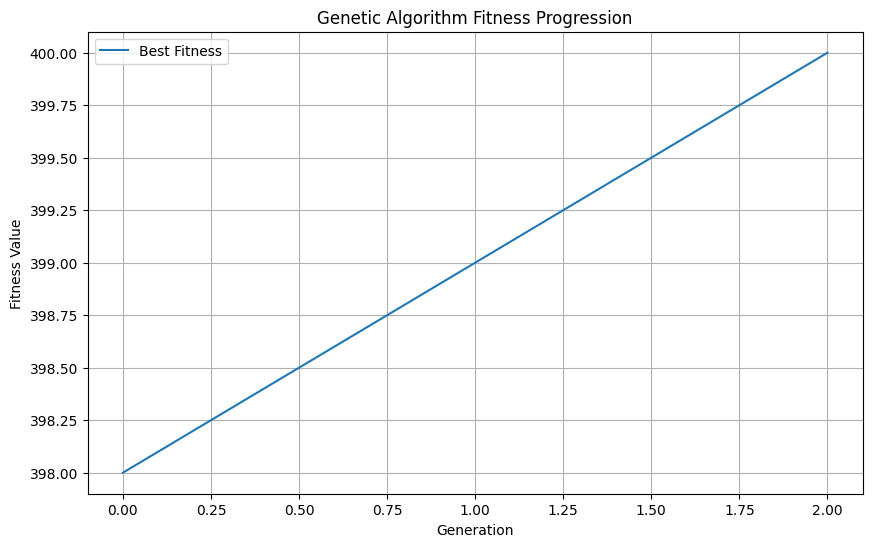

In [24]:
import random
import matplotlib.pyplot as plt

if __name__ == "__main__":
    # Taking input from files
    takeInput()

    # Initializing population size and Crossover and Mutation Probabilities
    population_size = random.randint(50, 150)
    crossover_probability = round(random.uniform(0.3, 1.0), 1)
    mutation_probability = round(random.uniform(0.01, 0.5), 1)




    # Printing Initialized variables
    print('----- Generated Parameters -----')
    print('Population size......: {}'.format(population_size))
    print('Crossover probability: {}'.format(crossover_probability))
    print('Mutation probability.: {}'.format(mutation_probability))


    # Running Genetic Algorithm and capturing fitness progression
    best_solution, fitness_progress = runGA()

    # Plotting fitness progression over generations
    plt.figure(figsize=(10, 6))
    plt.plot(fitness_progress, label='Best Fitness')
    plt.xlabel('Generation')
    plt.ylabel('Fitness Value')
    plt.title('Genetic Algorithm Fitness Progression')
    plt.legend()
    plt.grid(True)
    plt.show()


In [23]:
import plotly.graph_objects as go

def schedule_to_table(best_solution):
    days = [ "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday"]
    times = ["9:00 AM - 11:00 AM", "2:00 PM - 4:00 PM"]

    # Create empty schedule grid: rows=days, columns=time slots
    schedule_grid = [[[] for _ in times] for _ in days]

    for i, exam in enumerate(best_solution.chromosome):
        course = courses[i]  # match exam to course by index
        day_index = days.index(exam.day[0])
        time_index = 0 if exam.startTime[1] == 0 else 1

        room_str = ', '.join([r[0] for r in exam.roomNo])
        cell_text = f"{course.courseCode}\nRoom: {room_str}"
        schedule_grid[day_index][time_index].append(cell_text)

    # Join multiple exams in the same slot with a line break
    schedule_grid = [
        [ "<br>".join(cells) if cells else "" for cells in row]
        for row in schedule_grid
    ]

    fig = go.Figure(data=[go.Table(
        header=dict(values=["Day"] + times,
                    fill_color='paleturquoise',
                    align='center'),
        cells=dict(values=[days] + list(zip(*schedule_grid)),  # transpose to column-wise for Plotly table
                   fill_color='lavender',
                   align='center'))
    ])

    fig.update_layout(title="Exam Schedule Timetable")
    fig.show()

schedule_to_table(best_solution)
